# Calculo de probabilidades

In [ ]:
# Probabilidades

from random import randint, choice
import random
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, export_png
output_notebook()

def tirar_dado(tiros):
    lista_tiros = []
    for _ in range(tiros):
        lista_tiros.append(random.choice([1,2,3,4,5,6]))
    return lista_tiros

def calculo_probabilidad(tiros_totales):
    probabilidades = []
    tiro_1 = 0
    for tiros in tiros_totales:
        if 1 in tiros:
            tiro_1 +=1
    return tiro_1 / len(tiros_totales)
        
    
def plot(intentos, probabilidades):
    plot = figure(
        title = "Probabilidad de obtener 1 con 1 tiro",
        x_axis_label = "intentos",
        y_axis_label = "probabilidades"
    )
    plot.line(intentos, probabilidades)
    show(plot)
    #exportando como imagen
    #export_png(plot, filename="probabilidad1.png")
    


def main(tiros, intentos):
    # tiros * intentos
    tiros_por_intento = []
    probabilidades =[]
    escala = [x for x in range(0,intentos)]
    
    for _ in range (intentos):
        tiros_por_intento.append(tirar_dado(tiros))
        probabilidades.append(calculo_probabilidad(tiros_por_intento))
        
    plot(escala, probabilidades)
    
    

    
numero_tiros = int(input("Numero de tiros del dado: "))
## veces que correra la simulacion
numero_intentos = int(input("Numero de intentos :"))

main(numero_tiros, numero_intentos)


Numero de tiros del dado: 1
Numero de intentos :100


In [ ]:
# Usasndo distribucion binomial

import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt


# Secuencias tipo Bernuli

**Distribucion binomial**
$$P(k,n;p)=\begin{pmatrix}
n \\
k \\
\end{pmatrix}p^k(1-p)^{n-k}=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$$


**Probabilidades acumuladas**
$$P(k\leq2, n=3, p=1/2)=\sum_{k=0}^{2}{\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}}$$

* k numero de exitos
* n numero de lanzamientos
* p probabilidad de exito

In [ ]:
def mi_binomial(k, n, p ):
    """Resultado segun la ecuacion de Bernuli"""
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p, n-k)

print("Formas de obtener la distibucion binomial")
print("Uso de funcion:\t\t",mi_binomial(2,3,0.5))



dist = binom(3, 0.5)#3 intentos probabilidad de 0.5
print("Por libreria externa:\t",dist.pmf(2)) #probability mass funtion (2 exitos)



Formas de obtener la distibucion binomial
Uso de funcion:		 0.375
Por libreria externa:	 0.375


In [ ]:
# Uso exclusivo de los metodos de las funciones de probabilidad

dist = binom(3, 0.5) 
# Densidad de probabilidad o probability mass funtion
print(dist.pmf(2)) 

# Funcion de densidad acumulada, Cumulative density funtion
print(dist.cdf(2))


0.375
0.875


## Simulacion de sequencias con generadores aleatorios
_Los generadores aleatorios tienen como proposito simular muestras de datos que resultarian de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado_


In [ ]:
from random import randint
import numpy as np

"""
ls =[randint(1,10) for _ in range(100)]

#Cuenta todos los elementos repetidos en una lista
np.unique(ls , return_counts=True) #arreglo / numero apariciones del c/u


# Generador aleatorio
print(binomial(n, p))

print(np.unique(ls, return_counts=True)[1]/len(ls))

"""

'\nls =[randint(1,10) for _ in range(100)]\n\n#Cuenta todos los elementos repetidos en una lista\nnp.unique(ls , return_counts=True) #arreglo / numero apariciones del c/u\n\n\n# Generador aleatorio\nprint(binomial(n, p))\n\nprint(np.unique(ls, return_counts=True)[1]/len(ls))\n\n'

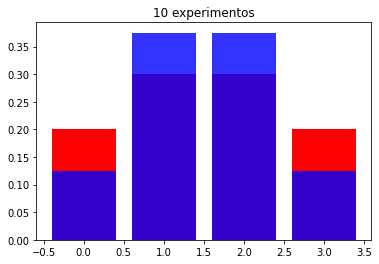

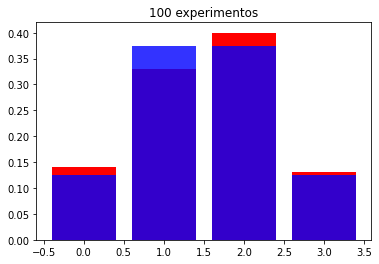

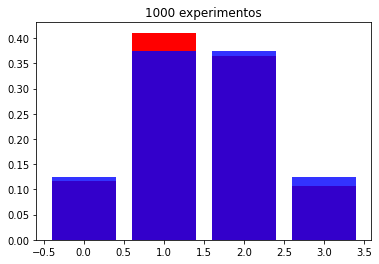

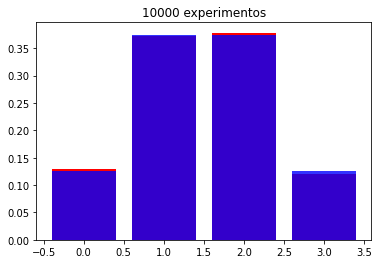

In [ ]:
# Simulacion:

p =0.5
n =3

# Simulacion de 100 lanzamientos

def plot_hist(num_trials):
    values=[0,1,2,3] # De 3 lanzamientos proba de conseguir una cara
    arr = []
    for _ in range(num_trials):
        arr.append(binomial(n,p))
    
    # Distribucion simulada  d_sim
    # Distribucion teorica   d_teor
    d_sim = np.unique(arr, return_counts=True)[1]/len(arr)
    d_teor = [binom(3, 0.5).pmf(k) for k in values]
    
    # Grafica
    plt.bar(values, d_sim, color="red")
    plt.bar(values, d_teor, alpha=0.8, color = "blue")
    plt.title(f"{num_trials} experimentos")
    plt.show()

plot_hist(10)
plot_hist(100)
plot_hist(1000)
plot_hist(10000)


# Distribucion normal o teorica

Conocida tambine como gauseanea\
_Definida como:_



$$P(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp
\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma}\right)^2\right]$$

* $\mu$: media de la distribucion
* $\sigma$: desviacion estandar de la distribucion



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm



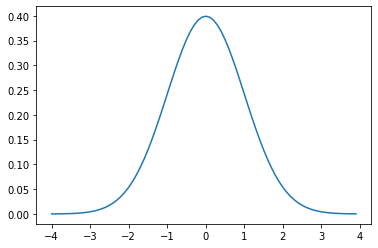

In [ ]:
# Definiendo la distribucion con un funcion
def gausean(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

## Probando la funcion gaussean
x = np.arange(-4, 4, 0.1)
y = gausean(x, 0, 1)
plt.plot(x, y)

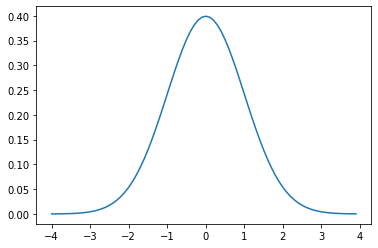

In [ ]:
# Usando scipy

dist =norm(0,1)
x = np.arange(-4, 4 ,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y)

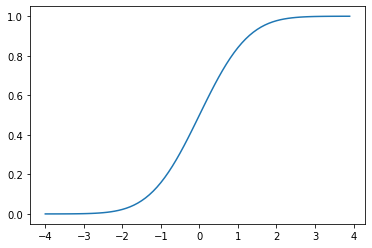

In [ ]:
# Calculo de la distribucion acumulada
dist = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]
plt.plot(x,y)

## Distribucion normal (guaseana) a partir de datos

* Datos obtenidos de la siguiente pagina:
    https://seattlecentral.edu/qelp/sets/057/057.html
    


In [ ]:
# comprobacion que que existe el dataframe
df = pd.read_excel("s057.xls")
print(df)

    Normally Distributed Housefly Wing Lengths  ...  Unnamed: 3
0          Sokal, R.R., and P.E.Hunter. 1955.   ...         NaN
1                                          NaN  ...         NaN
2                               length (x.1mm)  ...         NaN
3                                           36  ...   Frequency
4                                           37  ...           2
..                                         ...  ...         ...
98                                          52  ...         NaN
99                                          53  ...         NaN
100                                         53  ...         NaN
101                                         54  ...         NaN
102                                         55  ...         NaN

[103 rows x 4 columns]


[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55]


<BarContainer object of 19 artists>

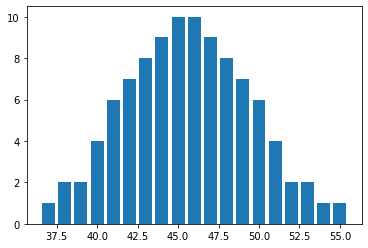

In [ ]:
## Obtencion de los datos necesarios
arr = df["Normally Distributed Housefly Wing Lengths"].values[4:]
values, dist = np.unique(arr, return_counts=True) # valores y frecuencia
print(values)
plt.bar(values, dist)

<BarContainer object of 19 artists>

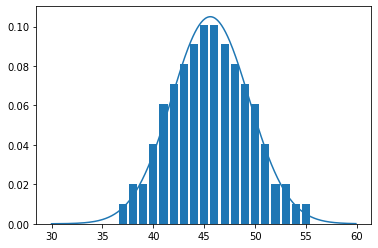

In [ ]:
# Estimacion de la distribucion de probabilidad


## distribucion teorica
mu = arr.mean()  # media
sigma = arr.std() # desviacion estandar

dist = norm(mu, sigma) # distribucion normal
x = np.arange(30, 60, 0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)

# datos
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))

# Estimacion de densidad


In [ ]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm


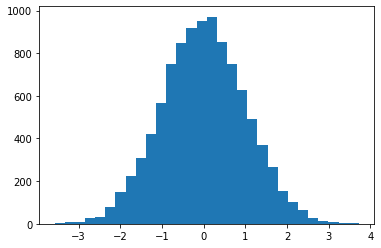

In [ ]:
sample = normal(size=10000) #Generador aleatorio basado en la distrib normal
## Datos generados aleatoriamente
pyplot.hist(sample, bins=30) # data genrda, intrvlos para barras del histograma
pyplot.show()

## Estimacion parametrica


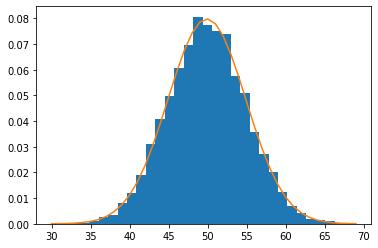

In [ ]:
sample = normal(loc=50, scale=5, size=10000) # media, std, tamaño
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30,70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()


## Estimacion no parametrica

**Biblioteca a utilizar**
* _[parámetro de suavizado]_: smoothing parameter
* _[función base]_: basis function

Sobre libreria en: https://scikit-learn.org/stable/modules/density.html

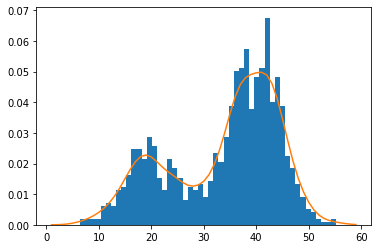

In [ ]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construccion de distribucion binomial (samples)
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))

model =KernelDensity(bandwidth=2, kernel="gaussian")
sample = sample.reshape((len(sample),1))
model.fit(sample)

values = np.asarray([value for value in range(1,60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) # probabilidad logaritmica
probabilities = np.exp(probabilities) # inversion de probabilidad exponencia

pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()





# MLE como base para la regresion logistica

En estadística, la estimación por máxima verosimilitud (conocida también como EMV y, en ocasiones, MLE por sus siglas en inglés Maximum likelihood estimation ) es un método habitual para ajustar un modelo y estimar sus parámetros.

Consideramos el problema de MLE:
$$ \max \sum_{i} \log P(y_i \vert x_i;h) $$

donde: \
$y_i$: Clase o categoria de cada elemento y $x_i$: son los atributos de cada elemento, donde ademas cada elemento del dataset satisface una distribucion de Bernulli:

$$
P = \begin{cases}
p, & \mbox{si $y=1$,}\\
1-p, & \mbox{si $y=0$.} 
\end{cases} 
$$

En este caso la verosimilitud esta dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta funcion da como resultado probabilidades altas cuando $\hat{y} \sim y$.



In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns


In [7]:
def likelihood(y, yp):
    return yp*y+(1-yp)*(1-y)

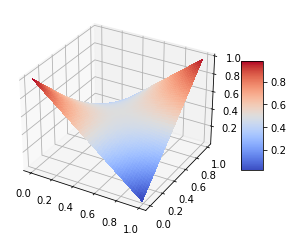

In [9]:
fig = plt.figure()
ax = fig.gca(projection="3d")

Y = np.arange(0, 1, 0.01)
YP = np.arange(0, 1, 0.01)
Y, YP = np.meshgrid(Y, YP)
Z = likelihood(Y, YP)

surf = ax.plot_surface(Y, YP, Z, cmap = cm.coolwarm,
                      linewidth=0, antialiased = False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Considerando $p \rightarrow \log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos: 

$$
max{\sum_i \left(y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)} \\
= \min - \sum_i \left( y \log \hat{y} + (1-y) \log (1-\hat{y}) \right)
$$

que es la conocida función de costo para clasificación conocida como Cross-entropy. 

## Regresion logistica con Scikit-learn


$$
\hat{y} = \frac{1}{1-\exp{(-\text{log-odds})}}
$$

donde:

$\text{log-odds} = \beta_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Utilizaremos el siguiente dataset para realizar un ejercicio de clasificacion simple:\
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html



In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

atrib_names = ["sepal length", "sepal width", "petal length", "petal width"]
x, y = load_iris(return_X_y=True)

In [11]:
# ver las medidas de los nombres de los atributos
x[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [12]:
# Ver la distribucion de tales medidas
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])